# Assignment 2: Graph Search
In this assignment you will be implementing a variety of graph search algorithms, with the eventual goal of solving tridirectional search.

Before you start, you will need:

1. [networkx](http://networkx.github.io/), which is a package for processing networks. This assignment will be easier if you take some time to test out and get familiar with the [basic methods](https://networkx.github.io/examples.html) of networkx. We have provided a version of networkx for you to use. It is in the lib folder. Please only use that version. If you have installed networkx already, run this code on a virtualenv without networkx installed. What's a virtualenv you say? See [this](http://docs.python-guide.org/en/latest/dev/virtualenvs/).

2. [matplotlib](http://matplotlib.org/downloads.html) for basic network visualization. You're free to use your own version :)

3. [Python 2.7.x](https://www.python.org/downloads/) (in case you're on Python 3).

We will be using two undirected networks for this assignment: a simplified [map](http://robotics.cs.tamu.edu/dshell/cs420/images/map.jpg) of Romania (from Russell and Norvig) and a full street map of Atlanta.

In [1]:
from __future__ import division
import random
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('lib')
import networkx

In [2]:
"""Romania map data from Russell and Norvig, Chapter 3."""
romania = pickle.load(open('romania_graph.pickle', 'rb'))
romania.reset_search()
print(romania['a'])

{'s': {'weight': 140}, 'z': {'weight': 75}, 't': {'weight': 118}}


Warmups
------
We'll start by implementing some simpler optimization and search algorithms before the real exercises.

Warmup 1: Priority queue
----------------------
5 points

In all searches that involve calculating path cost or heuristic (e.g. uniform-cost), we have to order our search frontier. It turns out the way that we do this can impact our overall search runtime. 

To show this, you'll implement a [priority queue](https://en.wikipedia.org/wiki/Priority_queue) and demonstrate its performance benefits. For large graphs, sorting all input to a priority queue is impractical. As such, the datastructure you implement should have an amortized O(1) insertion and O(lg n) removal time. It should do better than the naive implementation in our tests (InsertionSortQueue), which sorts the entire list after every insertion.

Hints: 
1. The [heapq](https://docs.python.org/2/library/heapq.html) module has been imported for you.
2. Each edge has an associated weight.

In [3]:
import heapq

class PriorityQueue():
    """Implementation of a priority queue 
    to store nodes during search."""
    # TODO: finish this class
    
    # HINT look up/use the module heapq.

    def __init__(self):
        self.queue = []
        self.current = 0    

    def next(self):
        if self.current >=len(self.queue):
            self.current
            raise StopIteration
    
        out = self.queue[self.current]
        self.current += 1

        return out

    def pop(self):
        # TODO: finish this
        raise NotImplementedError
        
    # TODO: This is a hint, you might require this in ucs,
    # however, if you choose not to use it, you are free to 
    # define your own method and not use it.
    def remove(self, nodeId):
        raise NotImplementedError

    def __iter__(self):
        return self

    def __str__(self):
        return 'PQ:[%s]'%(', '.join([str(i) for i in self.queue]))

    def append(self, node):
        # TODO: finish this
        raise NotImplementedError

    def __contains__(self, key):
        self.current = 0
        return key in [n for v,n in self.queue]

    def __eq__(self, other):
        return self == other

    def size(self):
        return len(self.queue)
    
    def clear(self):
        self.queue = []
        
    def top(self):
        return self.queue[0]

    __next__ = next

In [4]:
def check_pq():
    pq = PriorityQueue()
    temp_list = []

    for i in range(10):
        a = random.randint(0,10000)
        pq.append((a,'a'))
        temp_list.append(a)

    temp_list = sorted(temp_list)

    for i in temp_list:
        j = pq.pop()
        if not i == j[0]:
            return False

    return True

check_pq()

NotImplementedError: 

Warm-up 2: BFS
----------
5 pts


To get you started with handling graphs in networkx, implement and test breadth-first search over the test network.

You'll do complete this by writing the "breadth_first_search" method. This returns a path of nodes from a given start node to a given end node, as a list.

For this part, it is optional to use the PriorityQueue as your frontier. You will require it from the next question onwards. You can use it here too if you want to be consistent.

Notes:
1. You need to include start and goal in the path.
2. If your start and goal are the same then just return [].

Both of the above are just to keep your results consistent with our test cases.

You can access all the neighbors of a given node by calling graph[node], or graph.neighbors(node) ONLY. To measure your search performance, the modified version of networkx provided keeps track of which nodes you have accessed in this way (this is referred to as the set of 'Explored' nodes). To retrieve the set of nodes you've explored in this way, call graph.get_explored_nodes(). If you wish to perform multiple searches on the same graph instance, call 'graph.reset_search()' to clear out the current set of 'Explored' nodes. Note however, that you will not have access to the explored set on the test server. Also, there is no need to reset the graph while submitting to the test server.

In [7]:
romania.reset_search()
def t():
    raise NotImplementedError
t()

NotImplementedError: 

In [8]:
a = ['a']
b = a.copy()
b

['a']

In [9]:
graph['f']['b']['weight']

NameError: name 'graph' is not defined

In [10]:
type(graph['f']['b'])

NameError: name 'graph' is not defined

In [11]:
for i in romania['f']:
    print(i)

s
b


In [12]:
'b' in romania.get_explored_nodes()

False

In [13]:
['a'] + ['b']

['a', 'b']

In [14]:
    paths = []
    len(paths)
    queue = [start]
    paths = [[start]]
    print(paths)
    paths.append(['c','b'])
    print(paths)

NameError: name 'start' is not defined

In [15]:
for l in paths:
    print(l[-1])

In [16]:
    #In fact the queue here is the same as the frontier concept in the lecture
    romania.reset_search()
    start = 'a'
    goal = 'u'
    graph = romania
    queue = [start]
    paths = [[start]]
    def bfs():
        #print(len(queue))
        while len(queue)> 0:
            node  = queue.pop(0)
            graph[node] #Mark this as searched
            for l in paths: #Find the appropriate path to add new nodes
                if node == l[-1]:
                    TempPath = l
                    break
            for n in graph[node]: #For all the nodes who are the neighbor of this node
                if (not n in graph.get_explored_nodes()) and (not n in queue): #Not explored and not frontier
                    queue.append(n) #Get all the next nodes that are available 
                    t = TempPath.copy()
                    t.append(n)
                    paths.append(t)
                    if n==goal:
                        print(paths[-1])
                        break
            
    bfs()

['a', 's', 'f', 'b', 'u']


In [17]:
    graph.reset_search()
    def breadth_first_search(graph, start, goal):
        """Run a breadth-first search from start
        to goal and return the path."""
        #print(len(queue))
        queue = [start]
        paths = [[start]]
        while len(queue)> 0:
            node  = queue.pop(0)
            graph[node] #Mark this as searched
            for l in paths: #Find the appropriate path to add new nodes
                if node == l[-1]:
                    TempPath = l
                    break
            for n in graph[node]: #For all the nodes who are the neighbor of this node
                if (not n in graph.get_explored_nodes()) and (not n in queue): #Not explored and not frontier
                    queue.append(n) #Get all the next nodes that are available 
                    t = TempPath.copy()
                    t.append(n)
                    paths.append(t)
                    if n==goal:
                        #print(paths[-1])
                        return paths[-1]
                        break

In [18]:
breadth_first_search(graph, start, goal)

['a', 's', 'f', 'b', 'u']

In [19]:
# This function exists to help you visually debug your code.
# Feel free to modify it in any way you like.
# graph should be a networkx graph
# node_positions should be a dictionary mapping nodes to x,y coordinates

# IMP - This function may modify the graph you pass to it.
def draw_graph(graph, node_positions={}, start=None, goal=None, path=[]):

    explored = list(graph.get_explored_nodes())
    
    labels ={}
    for node in graph:
        labels[node]=node
        
    if not node_positions:
        node_positions = networkx.spring_layout(graph)

    networkx.draw_networkx_nodes(graph, node_positions)
    networkx.draw_networkx_edges(graph, node_positions, style='dashed')
    networkx.draw_networkx_labels(graph,node_positions, labels)
    
    networkx.draw_networkx_nodes(graph, node_positions, nodelist=explored, node_color='g') 

    if path:
        edges = [(path[i], path[i+1]) for i in range(0, len(path)-1)]
        networkx.draw_networkx_edges(graph, node_positions, edgelist=edges, edge_color='b')
   
    if start:
        networkx.draw_networkx_nodes(graph, node_positions, nodelist=[start], node_color='b')
    
    if goal:
        networkx.draw_networkx_nodes(graph, node_positions, nodelist=[goal], node_color='y')

    plt.plot()
    plt.show()

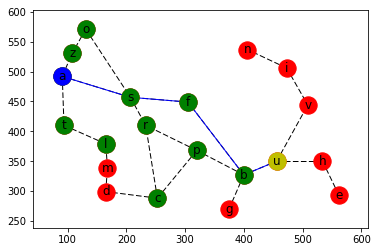

In [20]:
"""Testing and visualizing breadth-first search
in the notebook."""
start = 'a'
goal = 'u'

node_positions = {n: romania.node[n]['pos'] for n in romania.node.keys()}

romania.reset_search()
path = breadth_first_search(romania, start, goal)
#draw_graph(romania, node_positions=node_positions, start=start, goal=goal, path=['a','s','f','b','u'])
draw_graph(romania, node_positions=node_positions, start=start, goal=goal, path=path)
#['s', 'z', 't', 'r', 'o', 'f', 'l', 'p', 'c', 'b', 'm', 'd', 'u']
#['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd', 'u']

Warmup Examples
----------

Some examples of correct warmup searches can be found [here](https://docs.google.com/document/d/18Bl7awruAabUXAhMy-T88hWKTteueEb7hk6gA32GulQ/pub).




Warmup 3: Uniform-cost search
----------------------------
10 points

Implement uniform-cost search, using PriorityQueue as your frontier. From now on, PriorityQueue should be your default frontier.

uniform_cost_search() should return the same arguments as breadth-first search: the path to the goal node (as a list of nodes).


Notes:
1. You do need to include start and goal in the path.
2. If your start and goal are the same then just return []
3. We will provide some margin of error in grading the size of your 'Explored' set, but it should be close to the results provided by our reference implementation.

The above are just to keep your results consistent with our test cases.

In [65]:
import pip as pip
pip.install('priorityq')

AttributeError: module 'pip' has no attribute 'install'

In [70]:
from queue import PriorityQueue #For now we use the implemented Queue
from queue import Queue
import priorityq as pq
pq.PriorityQ()
def uniform_cost_search(graph, start, goal):
    """Run uniform-cost search from start
    to goal and return the path"""
    # TODO: finish this function
    raise NotImplementedError
    # return path

AttributeError: module 'priorityq' has no attribute 'PriorityQ'

In [112]:
def search(graph, start, goal):
    end = goal
    queue = PriorityQueue()
    queue.put((0, [start]))
    
    while not queue.empty():
        node = queue.get()
        current = node[1][len(node[1]) - 1]
        #print(node)
        if end in node[1]:
            print("Path found: " + str(node[1]) + ", Cost = " + str(node[0]))
            return node[1]
            break
        
        cost = node[0]
        for neighbor in graph[current]:
            if neighbor not in graph.get_explored_nodes():
                temp = node[1][:]
                temp.append(neighbor)
                queue.put((cost + graph[current][neighbor]['weight'], temp))
romania.reset_search()
search(graph, start, goal)

Path found: ['a', 's', 'r', 'p', 'b', 'u'], Cost = 503


['a', 's', 'r', 'p', 'b', 'u']

In [68]:
    def uniform_cost_search(graph, start, goal):
        """Return the shortest path from start to goal node.
        args:
            start: the node to begin the path
            goal: the node to end the path
        """
        q = pq.PriorityQ()
        q.insert((0, start, []), priority=0)
        seen = {}

        while q:
            cost, point, path = q.pop()
            if point in seen and seen[point] < cost:
                continue
            path = path + [point]
            if point == goal:
                return path
            for child in graph[point]:
                child_cost = graph[point][child]['weight']
                if child not in seen:
                    tot_cost = child_cost + cost
                    q.insert((tot_cost, child, path), priority=tot_cost)
            seen[point] = cost
        return None
    uniform_cost_search(graph, start, goal)

AttributeError: 'PriorityQueue' object has no attribute 'insert'

In [57]:
def ucs(graph, start, goal):
    queue = PriorityQueue()
    queue.put((0, start, []), priority=0)
    paths = [[start]]
    while queue:
        #print(queue.get())
        cost, node = queue.get()
        if point in seen and seen[point] < cost:
            continue
        path = path + [point]
        if node not in graph.get_explored_nodes():
            graph[node]
            if node == goal:
                print(paths)
                return
            for i in graph[node]:
                if i not in graph.get_explored_nodes():
                    total_cost = cost + graph[node][i]['weight']
                    queue.put((total_cost, i))

In [72]:
    queue = PriorityQueue()
    queue.put((0, start, []), priority=0)

TypeError: put() got an unexpected keyword argument 'priority'

In [75]:
graph['a']['s']

{'weight': 140}

In [60]:
romania.reset_search()
ucs(graph, start, goal)

[['a'], ['a', 'a'], ['a', 'z'], ['a', 'z', 't'], ['a', 'z', 't', 's'], ['a', 'z', 't', 's', 'o'], ['a', 'z', 't', 's', 'o', 'r'], ['a', 'z', 't', 's', 'o', 'r', 'l'], ['a', 'z', 't', 's', 'o', 'r', 'l', 'f'], ['a', 'z', 't', 's', 'o', 'r', 'l', 'f', 'o'], ['a', 'z', 't', 's', 'o', 'm'], ['a', 'z', 't', 's', 'o', 'm', 'p'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd', 'b'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd', 'b', 'b'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd', 'b', 'c'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd'], ['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd', 'u']]


Path found: ['a', 's', 'r', 'p', 'b', 'u'], Cost = 503


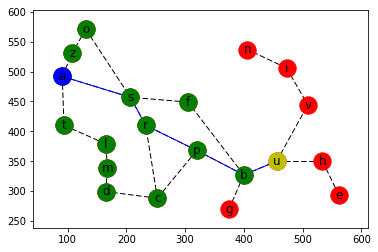

In [81]:
start = 'a'
goal = 'u'

node_positions = {n: romania.node[n]['pos'] for n in romania.node.keys()}

romania.reset_search()
path = search(romania, start, goal)
#draw_graph(romania, node_positions=node_positions, start=start, goal=goal, path=['a','s','f','b','u'])
draw_graph(romania, node_positions=node_positions, start=start, goal=goal, path=path)
#['s', 'z', 't', 'r', 'o', 'f', 'l', 'p', 'c', 'b', 'm', 'd', 'u']
#['a', 'z', 't', 's', 'o', 'm', 'p', 'c', 'd', 'u']

Warmup 4: A\* search
------------------
10 points
Implement A\* search using Euclidean distance as your heuristic. You'll need to implement heuristic_euclid() then pass that function to a_star() as the heuristic parameter. We provide null_heuristic() as a baseline heuristic to test against when calling a_star tests.

Hint: you can find a node's position by calling:

     graph.node[n]['pos']      - Romania map
     graph.node[n]['position'] - Atlanta map
     
Tip: use graph.node[n].get('position') or graph.node[n].get('pos') to check if the key is available.

Notes:
1. You do need to include start and goal in the path.
2. If your start and goal are the same then just return []
3. We will provide some margin of error in grading the size of your 'Explored' set, but it should be close to the results provided by our reference implementation.

The above are just to keep your results consistent with our test cases.

In [85]:
graph.node['s']['pos']-graph.node['a']['pos']

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [93]:
v = 'a'
goal = 'u'
a1 = graph.node[v]['pos']
a2 = graph.node[goal]['pos']
for a,b in zip(a1,a2):
    print((a-b)**2)

133225
20164


In [96]:
import math as math
math.sqrt(2)

1.4142135623730951

In [101]:
euclidean_dist_heuristic(graph, 'a', 'z')

42.5440947723653

In [84]:
graph['a']

{'s': {'weight': 140}, 't': {'weight': 118}, 'z': {'weight': 75}}

In [ ]:
def null_heuristic(graph, v, goal):
    """Return 0 for all nodes."""
    return 0

In [97]:
def euclidean_dist_heuristic(graph, v, goal):
    """Return the Euclidean distance from
    node v to the goal."""
    # TODO: finish this function
    try:
        a1 = graph.node[v]['pos']
        a2 = graph.node[goal]['pos']
    except:
        a1 = graph.node[v]['position']
        a2 = graph.node[goal]['position']
    suma = 0
    for a,b in zip(a1,a2):
        suma = suma + (a-b)**2
    return math.sqrt(suma)

In [113]:
def Asearch(graph, start, goal):
    end = goal
    queue = PriorityQueue()
    queue.put((euclidean_dist_heuristic(graph, start, goal), [start]))
    
    while not queue.empty():
        node = queue.get()
        current = node[1][-1]
        #print(current)
        #print(node[1][-1])
        if end in node[1]: #Terminate the search algorithm if we have found the goal that we want to find
            print("Path found: " + str(node[1]) + ", Cost = " + str(node[0]))
            return node[1]
            break
        
        cost = node[0]
        for neighbor in graph[current]:
            if neighbor not in graph.get_explored_nodes():
                temp = node[1][:]
                temp.append(neighbor)
                queue.put((cost + graph[current][neighbor]['weight'] + euclidean_dist_heuristic(graph, neighbor, goal) - euclidean_dist_heuristic(graph, current, goal), temp))
graph.reset_search()
Asearch(graph, start, goal)

Path found: ['a', 's', 'r', 'p', 'b', 'u'], Cost = 503.00000000000006


['a', 's', 'r', 'p', 'b', 'u']

In [ ]:
def a_star(graph, start, goal, heuristic):
    """Run A* search from the start to
    goal using the specified heuristic
    function, and return the final path."""
    # TODO: finish this function
    raise NotImplementedError
    # return path

Exercises
-------


The following exercises will require you to implement several kinds of bidirectional and tridirectional searches.

The benefits of these algorithms over uninformed or unidirectional search are more clearly seen on larger graphs. As such, during grading, we will evaluate your performance on the map of Atlanta [OpenStreetMap](wiki.openstreetmap.org/) included in this assignment. If you want to run tests in iPython notebook using this data (rather than just testing on the server), you'll need to load the data from file in the cell below. If you're testing locally, be advised, not all nodes are connected.

In [107]:
from osm2networkx import *
"""Loading Atlanta map data."""
atlanta = pickle.load(open('atlanta_osm.pickle','rb'))
atlanta.reset_search()

Visualizing search results
---

When using a geographic network, you may want to visualize your searches. We can do this by converting the search results to a [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) file which we then visualize on [Gist](https://gist.github.com/) by [importing](https://github.com/blog/1576-gist-meets-geojson) the file.

We provide a method for doing this in visualize_graph.py called plot_search(), which takes as parameters the graph, the name of the file to write, the nodes on the path, and the set of all nodes explored. This produces a GeoJSON file named as specified, which you can upload to Gist to visualize the search path and explored nodes.

In [108]:
"""Example of how to visualize search results
with two sample nodes in Atlanta."""
from visualize_graph import plot_search
# NOTE: *** Please complete the  bidirectional_ucs before this.***
# You can try visualization with any other search methods completed above too.
atlanta.reset_search()
path = bidirectional_ucs(atlanta, '69244359', '557989279')
all_explored = atlanta.get_explored_nodes()
plot_search(atlanta, 'atlanta_search.json', path, all_explored)
# then upload 'atlanta_search.json' to Gist

NameError: name 'bidirectional_ucs' is not defined

Exercise 1: Bidirectional uniform-cost search
-------
15 points

Implement bidirectional uniform-cost search. Remember that this requires starting your search at both the start and end states.

bidirectional_ucs() should return the path from the start node to the goal node (as a list of nodes).

Notes:

    1) You do need to include start and goal in the path.
    2) If your start and goal are the same then just return []
    3) We will provide some margin of error in grading the size of your 'Explored' set, but it should be close to the results provided by our reference implementation.
 

All of the above are just to keep your results consistent with our test cases.

In [ ]:
        #The terminate condition for the previous question
        #print(node)
        if end in node[1]:
            print("Path found: " + str(node[1]) + ", Cost = " + str(node[0]))
            return node[1]
            break

In [155]:
def bidirectional_ucs(graph, start, goal):
    """Run bidirectional uniform-cost search
    between start and goal"""
    # TODO: finish this function
    end = goal
    #count = 0
    queue1 = PriorityQueue()
    queue1.put((0, [start])) #Search from start to goal
    queue2 = PriorityQueue()
    queue2.put((0, [goal])) #Search from goal to start
    current2 = 0
    #The terminate condition is that when the frontier of the 2 search meets
    while not (queue1.empty() or queue2.empty()):
        #The search from start
        node1 = queue1.get()
        current1 = node1[1][-1]
        
        cost1 = node1[0]
        NS = []
        NSP = []
        #print(current2)
        for neighbor in graph[current1]:
            if neighbor not in graph.get_explored_nodes():
                NS.append(neighbor)
                temp = node1[1][:] #The path until now
                temp.append(neighbor) #add the new neighbor to the current existed path
                NSP.append(temp)
                queue1.put((cost1 + graph[current1][neighbor]['weight'], temp))

        #The search from goal
        node2 = queue2.get()
        current2 = node2[1][-1]
        
        cost2 = node2[0]
        NE = []
        NEP = []
        for neighbor in graph[current2]:
            if neighbor == current1:
                #try:
                #    print(node1[1])
                #    print(node2[1])
                #    print(neighbor)
                #except:
                #    print(node1[1])
                ind = node2[1].index(neighbor)
                temp = node2[1][0:ind]
                temp.reverse()
                return node1[1] + temp
            if neighbor not in graph.get_explored_nodes():
                #count = count + 1
                NE.append(neighbor)
                temp = node2[1][:] #The path until now
                temp.append(neighbor) #add the new neighbor to the current existed path
                NEP.append(temp)
                queue2.put((cost2 + graph[current2][neighbor]['weight'], temp))

#     return path

In [156]:
graph.reset_search()
bidirectional_ucs(graph, start, goal)

['a', 's', 'r', 'p', 'b', 'u']

Exercise 2: Bidirectional A\* search
-------
20 points

Implement bidirectional A\* search. Remember that you need to calculate a heuristic for both the start-to-goal search and the goal-to-start search.

To test this function, as well as using the provided tests, you can compare the path computed by bidirectional A star to bidirectional ucs search above.

bidirectional_a_star should return the path from the start node to the goal node, as a list of nodes.

Notes:

    1) You do need to include start and goal in the path.
    2) If your start and goal are the same then just return []
    3) We will provide some margin of error in grading the size of your 'Explored' set, but it should be close to the results provided by our reference implementation.


In [157]:
def bidirectional_a_star(graph, start, goal, heuristic):
    """Run bidirectional A* search between
    start and goal."""
    # TODO: finish this function
    """Run bidirectional uniform-cost search
    between start and goal"""
    # TODO: finish this function
    end = goal
    #count = 0
    queue1 = PriorityQueue()
    queue1.put((0, [start])) #Search from start to goal
    queue2 = PriorityQueue()
    queue2.put((0, [goal])) #Search from goal to start
    current2 = 0
    #The terminate condition is that when the frontier of the 2 search meets
    while not (queue1.empty() or queue2.empty()):
        #The search from start
        node1 = queue1.get()
        current1 = node1[1][-1]
        
        cost1 = node1[0]
        NS = []
        NSP = []
        #print(current2)
        for neighbor in graph[current1]:
            if neighbor not in graph.get_explored_nodes():
                NS.append(neighbor)
                temp = node1[1][:] #The path until now
                temp.append(neighbor) #add the new neighbor to the current existed path
                NSP.append(temp)
                queue1.put((cost1 + graph[current1][neighbor]['weight'] + euclidean_dist_heuristic(graph, neighbor, goal) - euclidean_dist_heuristic(graph, current1, goal), temp))

        #The search from goal
        node2 = queue2.get()
        current2 = node2[1][-1]
        
        cost2 = node2[0]
        NE = []
        NEP = []
        for neighbor in graph[current2]:
            if neighbor == current1:
                #try:
                #    print(node1[1])
                #    print(node2[1])
                #    print(neighbor)
                #except:
                #    print(node1[1])
                ind = node2[1].index(neighbor)
                temp = node2[1][0:ind]
                temp.reverse()
                return node1[1] + temp
            if neighbor not in graph.get_explored_nodes():
                #count = count + 1
                NE.append(neighbor)
                temp = node2[1][:] #The path until now
                temp.append(neighbor) #add the new neighbor to the current existed path
                NEP.append(temp)
                queue2.put((cost2 + graph[current2][neighbor]['weight']+ euclidean_dist_heuristic(graph, neighbor, start) - euclidean_dist_heuristic(graph, current2, start), temp))


In [158]:
graph.reset_search()
bidirectional_a_star(graph, start, goal)

TypeError: bidirectional_a_star() missing 1 required positional argument: 'heuristic'

Exercise 3: Tridirectional search
------
20 points

Implement tridirectional search in the naive way: starting from each goal node, perform a uniform-cost search and keep expanding until two of the three searches meet. This should be one continuous path that connects all three nodes. You can return the path in any order. Eg. (1->2->3 == 3->2->1)

tridirectional_search should return the path from the start node to the goal node (as a list of nodes).

Notes:

    1) You need to include start and goal in the path.
    2) If any goals are the same then just return [] as the path between them.
    3) We will provide some margin of error in grading the size of your 'Explored' set, but it should be close to the results provided by our reference implementation.


In [ ]:
def tridirectional_search(graph, goals):
    """Run tridirectional uniform-cost search
    between the goals and return the path."""
    # TODO: finish this function
    raise NotImplementedError
    #return path

Exercise 4: Tridirectional search
------
15 points

This is the heart of the assignment. Implement tridirectional search in such a way as to consistently improve on the performance of your previous implementation. This means consistently exploring fewer nodes during your search in order to reduce runtime.

The specifics are up to you, but we have a few suggestions:
- Tridirectional A*
- choosing landmarks and precomputing reach values
- ATL (A\*, landmarks, and triangle-inequality)
- shortcuts (skipping nodes with low reach values)

tridirectional_upgraded() should return a path between all three nodes.

Notes:

    1) You do need to include each goal in the path.
    2) If any two goals are the same then just return [] as the path between them
    3) We will provide some margin of error in grading the size of your 'Explored' set, but it should be close to the results provided by our reference implementation.

In [ ]:
def tridirectional_upgraded(graph, goals, heuristic):
    """Run an improved tridirectional search between
    goals, and return the path."""
    # TODO: finish this function
    raise NotImplementedError
    #return path

Race!
---
Here's your chance to show us your best stuff. This part is mandatory if you want to compete in the race for extra credit. Implement custom_search() using whatever strategy you like. Your search should be tri-directional and it'll be tested on the Atlanta map only.

In [ ]:
def custom_search(graph, goals):
    """Run your best tridirectional search between
    goals, and return the path."""
    raise NotImplementedError
    # return path